In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Load data (deserialize)
with open('2b.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    
df, df_clean = unserialized_data

In [151]:
df.groupby('error').count()

,tmpdate,tmpdcm,pixels,filename,admdose,reqdose,difdose,reldifdose,tmpcurve
error,,,,,,,,,
False,1430,1430,1430,1430,1430,1045,1045,1045,1430
True,2,2,2,2,2,2,2,2,2


In [152]:
df_clean = df_clean.sort_values(by='tmpdate')
df_clean = df_clean.reset_index()

In [153]:
df_clean.loc[df_clean['error'] == True]

,index,tmpdate,tmpdcm,pixels,filename,admdose,reqdose,difdose,reldifdose,tmpcurve,error
15,97,20171201,"[(0008, 0005) Specific Character Set ...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",anon_1291559a-443f-4e19-9bb9-1091e08fbc8d,163.719,176,12.2808,0.0697773,"[0.9948186528497409, 1.0, 1.0, 1.0, 1.0, 1.0, ...",True
77,139,20171215,"[(0008, 0005) Specific Character Set ...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",anon_1a1aebb1-0120-422f-adc8-14a62b238360,102.215,110,7.7845,0.0707682,"[0.9948186528497409, 1.0, 1.0, 1.0, 1.0, 1.0, ...",True


In [154]:
df_clean.groupby('error').count()


,index,tmpdate,tmpdcm,pixels,filename,admdose,reqdose,difdose,reldifdose,tmpcurve
error,,,,,,,,,,
False,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045
True,2,2,2,2,2,2,2,2,2,2


0.003293930141443451
0.012275687940249818


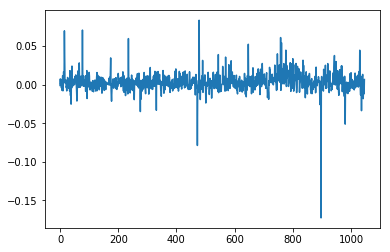

In [155]:
print(df_clean["reldifdose"].mean())
print(df_clean["reldifdose"].std())
df_clean.iloc[14]
plt.plot(df_clean['reldifdose'])


In [156]:
def total_variation(curve):
    tv = 0
    for i in range(len(curve)):
        
        if (i+1 < len(curve)):
            delta = curve[i+1] - curve[i]
            delta = abs(delta)
            tv = tv + delta
    return tv - 1
                    

In [72]:
import numpy as np
def poly(curve):
    return np.polyfit(range(len(curve)), curve, 10)

In [73]:
df_clean['tv'] = df['tmpcurve'].apply(lambda x: total_variation(x))
df_clean['polycoef'] = df['tmpcurve'].apply(lambda x: poly(x))

In [109]:
df_clean.loc[15].error

True

In [75]:
def pltcurve(curve):
    plt.plot(range(len(curve)), curve)
    
def pltcoef(coef):
    x = range(160)
    
    y = np.poly1d(coef)
    
    plt.plot(x, y(x))
    

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 4 4 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 8]
  [8 8 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 2 2 2]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


TypeError: Invalid dimensions for image data

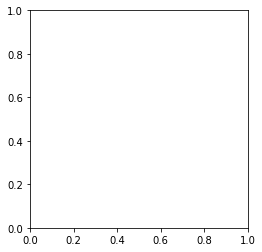

In [162]:
pixels = df_clean.iloc[20].pixels
print(pixels)
plt.imshow(pixels)